This is a Resnet18-based model which can identify and distinguish between the following celestial bodies in our solar system:
8 recognized planets, 2 dwarf planets (Pluto and Makemake), and the Moon.

## Importing fastai

In [1]:
from fastai.vision.all import *

## Specifying path for the training dataset

For my training data, I have slightly modified a Kaggle dataset, the APA-formatted citation of which is as follows:
Emirhan BULUT. Planets and Moons Dataset - AI in Space 🌌 🛰 ☄ 🔭 : A public dataset for large-scale multi-label and multi-class image classification, 2022. Available from https://github.com/emirhanai/Planets-and-Moons-Dataset-AI-in-Space and https://www.kaggle.com/datasets/emirhanai/planets-and-moons-dataset-ai-in-space

In [2]:
path = '/kaggle/input/soggyplanets/SoggyPlanets/Training'

As you can see below, 1638 images are being used to train the model.

In [3]:
files = get_image_files(path)
len(files)

1638

In [4]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
dwarves = ['Pluto', 'MakeMake']

## Data Augmentation and Validation Split

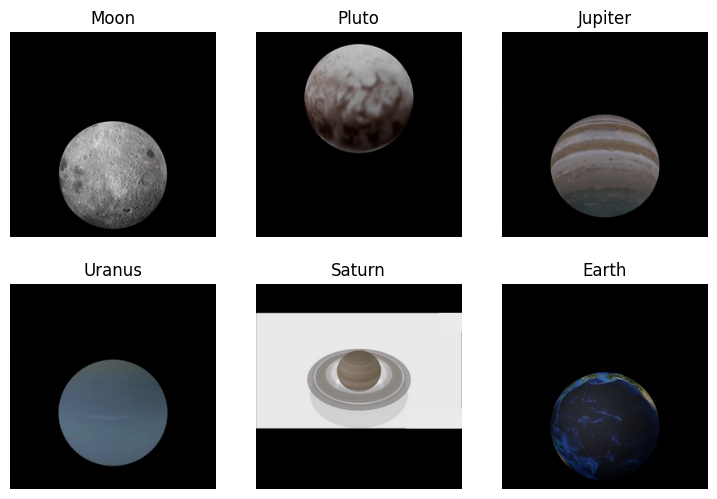

In [20]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=[Resize(256, method='pad', pad_mode=PadMode.Zeros)]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

The 6 images above are randomly selected from the training dataset for you to preview. However, all 1638 files are being used to train the Resnet18 Architecture.

## Training the model

In [16]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.898640,0.057047,0.021407,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.062459,0.000111,0.000000,00:10
